we start by analyzing the dataset to understand its structure and handle missing values.

step 3.1 ### Importing Libraries

First of all, we import the fundamental libraries required for data analysis and visualization:
- `numpy`: Helps with efficient numerical operations.
- `pandas`: Provides powerful data structures to load and manipulate our dataset.
- `matplotlib.pyplot`: Helps in creating various types of visualizations to gain insights into our dataset.

In [107]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For loading and managing datasets
import matplotlib.pyplot as plt  # For visualizations

# Setting up matplotlib for inline plotting
%matplotlib inline


### Loading the Dataset
We load the dataset from a CSV file using `pandas`. Displaying the first few rows gives us an overview of the available features, helping us understand the types of data we are working with.

In [108]:
# Loading the dataset
file_path = 'alien_galaxy.csv'  # File path to the dataset
dataset = pd.read_csv(file_path)

# Displaying the first few rows to understand the data structure
dataset.head()


,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Galactic_Trade_Revenue,Alien_Civilization_Level,Interstellar_Contact_Cost,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,78285.0,10.0,Married,98.55,3118.0,NaN,11.0,Master,3.0,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,62772.0,10.0,Single,66.36,3099.0,0.0,11.0,Master,3.0,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,69016.0,5.0,Married,25.23,3100.0,0.0,11.0,Graduation,3.0,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,43795.0,NaN,Together,44.59,3098.0,1.0,11.0,Master,3.0,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,57957.0,8.0,Together,90.67,3089.0,0.0,11.0,Graduation,3.0,4.0


Step 3.2: Exploratory Data Analysis (EDA)

### Dataset Overview
Here, we describe the dataset to understand its characteristics:
- We use `.describe()` to obtain summary statistics like mean, standard deviation, min, and max values for numerical features.
- We also check for missing values to determine if any data preprocessing is required.

In [109]:
# Getting a summary of the dataset
dataset.describe()  # Provides statistical insights into numerical columns

# Checking for missing values in each column
missing_values = dataset.isnull().sum()
missing_values


Peace_Treaty_Accords                   235
Technological_Advancements             212
Ammonia_Concentration                  217
Precious_Metal_Trade_Tons              215
Food_Production_Tons                   246
Trade_Agreements_Signed                207
Last_Contact_Days                      234
Discovery_Date                         226
Mineral_Extraction_Tons                208
Galactic_Visits                        220
Sulfur_Concentration                   209
Exploration_Missions                   222
Biological_Research_Units              209
Offspring_Colonies                     238
Cultural_Exchange_Programs             224
Military_Engagements                   220
Inhabitants_Disputes                   229
Resource_Mining_Operations             231
Resource_Allocation_Credits            200
Young_Colonies                         226
HeavyMetals_Concentration              210
Terraforming_Initiatives               230
Planet_ID                              216
Liquid_Ener

Step 3.2.2: Initial Visualizations

### Feature Distributions
To better understand the dataset, we visualize the distributions of key features:
- For instance, we look at `Ammonia_Concentration`, `Precious_Metal_Trade_Tons`, and `Food_Production_Tons`.
- This helps in detecting skewed data or potential outliers in our dataset.


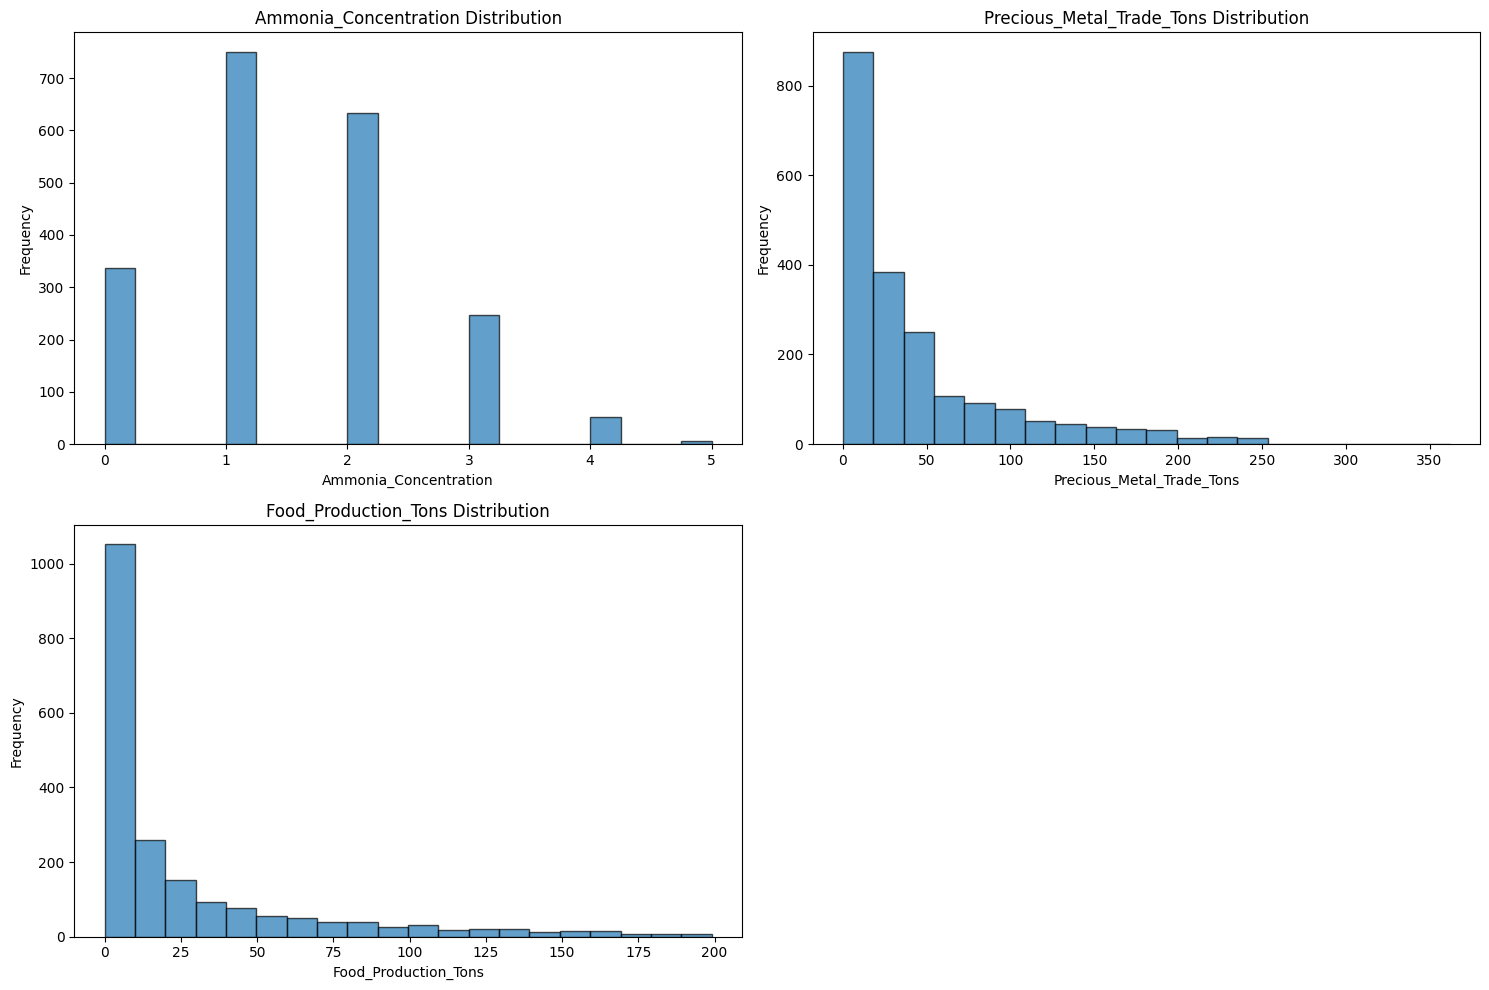

In [110]:
# Visualizing feature distributions
features_to_plot = ['Ammonia_Concentration', 'Precious_Metal_Trade_Tons', 'Food_Production_Tons']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    plt.hist(dataset[feature], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Step 3.3: Preprocessing

Step 3.3.1: Handling Missing Values

### Handling Missing Values
We handle missing values by:
- **Numerical Features**: Replacing missing values with the mean.
- **Categorical Features**: Replacing missing values with the mode (most frequent value).
This ensures that we retain the dataset's size while addressing incomplete records.

In [111]:

# Handling missing values

# Numerical features: Impute missing values with mean
numerical_features = ['Ammonia_Concentration', 'Food_Production_Tons']
for feature in numerical_features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].mean())

# Categorical features: Impute missing values with mode
categorical_features = ['Dominant_Species_Social_Structure', 'Alien_Civilization_Level']
for feature in categorical_features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].mode()[0])


### Verification of Missing Value Handling
We verify the changes to ensure that all missing values have been appropriately imputed. The output should show zero missing values in each column, confirming that the imputation was successful.

In [112]:
# Verifying that there are no more missing values
missing_values_after = dataset.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)


Missing values after imputation:
 Peace_Treaty_Accords                   235
Technological_Advancements             212
Ammonia_Concentration                    0
Precious_Metal_Trade_Tons              215
Food_Production_Tons                     0
Trade_Agreements_Signed                207
Last_Contact_Days                      234
Discovery_Date                         226
Mineral_Extraction_Tons                208
Galactic_Visits                        220
Sulfur_Concentration                   209
Exploration_Missions                   222
Biological_Research_Units              209
Offspring_Colonies                     238
Cultural_Exchange_Programs             224
Military_Engagements                   220
Inhabitants_Disputes                   229
Resource_Mining_Operations             231
Resource_Allocation_Credits            200
Young_Colonies                         226
HeavyMetals_Concentration              210
Terraforming_Initiatives               230
Planet_ID           

Step 3.3.2: Encoding Categorical Variables

### Encoding Categorical Features
Categorical features, such as `Dominant_Species_Social_Structure`, are converted to numerical values using **Label Encoding**. This step is necessary for our machine learning models, which require numerical input.


In [113]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    dataset[feature] = label_encoder.fit_transform(dataset[feature])


Step 3.4: Clustering Implementation

### K-Means Clustering
We use **K-Means Clustering** to group planets based on their features. We begin with 3 clusters as a preliminary guess, and we visualize the resulting groups to observe clustering behavior.

# Step 3.4: Handle Date Columns

In [114]:
import pandas as pd

# Convert date columns to numeric
# Assuming 'Discovery_Date' is the problematic date column

In [115]:
dataset['Discovery_Date'] = pd.to_datetime(dataset['Discovery_Date'], format='%d-%m-%Y')

# Convert date to number of days since a reference date, e.g., 1st Jan 2000

In [116]:
reference_date = pd.to_datetime('2000-01-01')
dataset['Discovery_Date'] = (dataset['Discovery_Date'] - reference_date).dt.days


# Double-check for any other non-numeric data columns

In [117]:
non_numeric_columns = dataset.select_dtypes(include='object').columns
print("Non-numeric columns remaining: ", non_numeric_columns)

Non-numeric columns remaining:  Index([], dtype='object')


In [118]:
# Dropping rows with any remaining missing values
dataset = dataset.dropna()


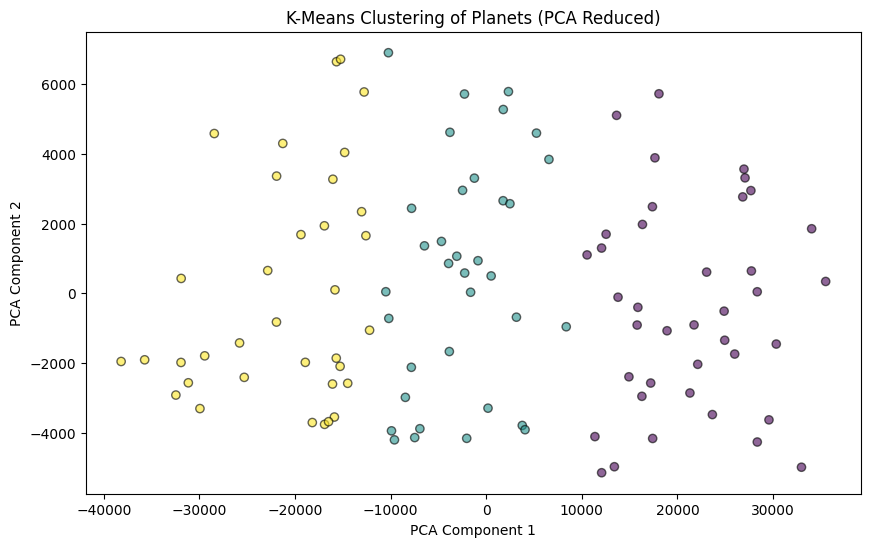

In [119]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset)

# Step 2: Apply K-means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans_pca = kmeans.fit_predict(dataset_pca)

# Step 3: Visualize the K-means Clustering on the PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=y_kmeans_pca, cmap='viridis', alpha=0.6, edgecolor='k')
plt.title('K-Means Clustering of Planets (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



In [120]:
print(dataset.describe())
print(dataset.head())


       Peace_Treaty_Accords  Technological_Advancements  \
count            109.000000                  109.000000   
mean               0.082569                    0.091743   
std                0.276501                    0.289996   
min                0.000000                    0.000000   
25%                0.000000                    0.000000   
50%                0.000000                    0.000000   
75%                0.000000                    0.000000   
max                1.000000                    1.000000   

       Ammonia_Concentration  Precious_Metal_Trade_Tons  Food_Production_Tons  \
count             109.000000                 109.000000            109.000000   
mean                1.586385                  50.238532             29.927747   
std                 0.969146                  56.075329             40.867085   
min                 0.000000                   0.000000              0.000000   
25%                 1.000000                   8.000000        

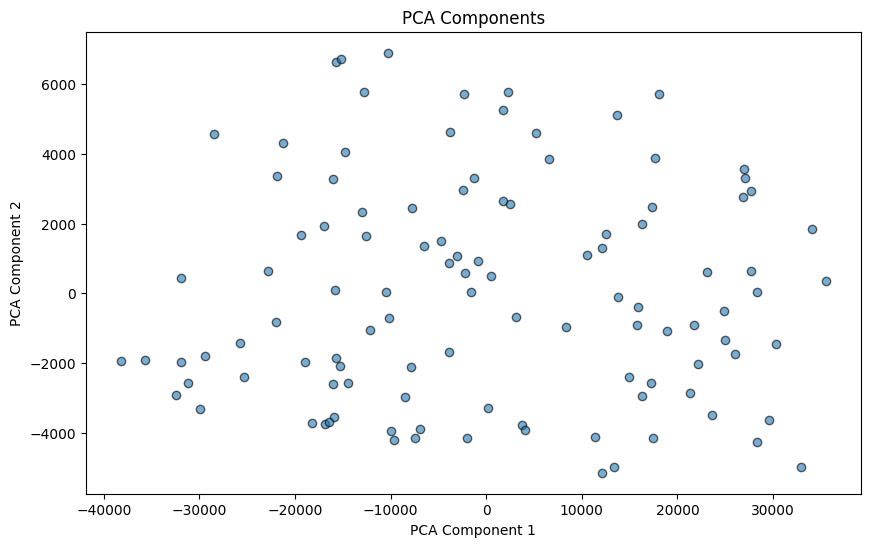

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset)

# Visualize PCA Components
plt.figure(figsize=(10, 6))
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], alpha=0.6, edgecolor='k')
plt.title('PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


Step 3.5: Hierarchical Clustering

Step 3.5.1: Dendrogram and Agglomerative Clustering
### Dendrogram Analysis
The **Dendrogram** helps us determine the optimal number of clusters by showing the distances at which clusters are formed. We use Ward's linkage method to minimize the variance within each cluster.

In [122]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# PCA (Optional but useful for visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(scaled_data)


In [123]:
from sklearn.cluster import KMeans

# Applying K-means clustering to scaled or PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)  # or dataset_pca


In [124]:
from sklearn.cluster import AgglomerativeClustering

# Applying Agglomerative Clustering with Ward Linkage on scaled or PCA-reduced data
agc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_agc = agc.fit_predict(scaled_data)  # or dataset_pca


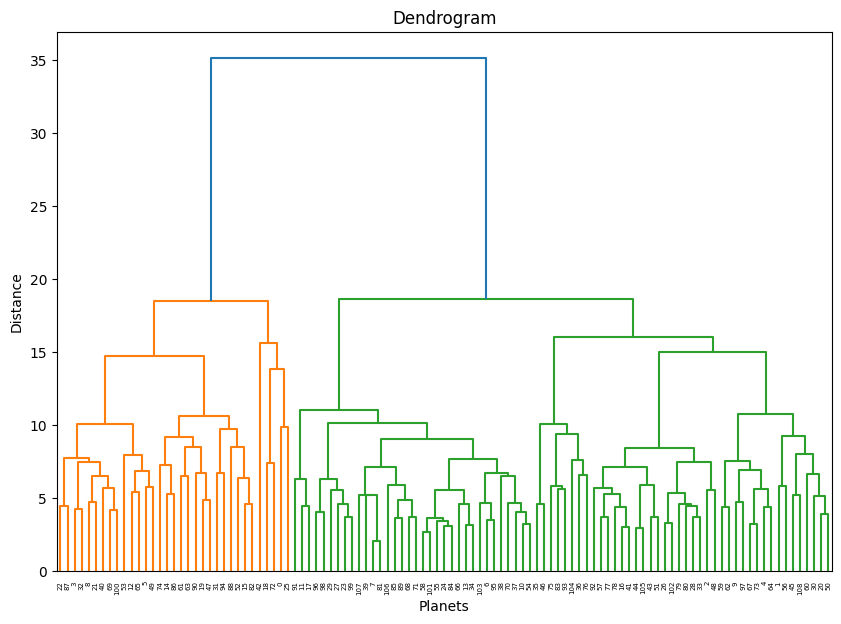

In [125]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))  # Use scaled data or PCA-reduced data
plt.title('Dendrogram')
plt.xlabel('Planets')
plt.ylabel('Distance')
plt.show()


Step 3.5.2: Agglomerative Hierarchical Clustering
### Agglomerative Hierarchical Clustering (Ward Linkage)
We implement **Agglomerative Clustering** using **Ward Linkage** to form groups of planets. Ward linkage is used to minimize the variance within each cluster, and we visualize the results to observe how the clustering behavior differs from K-Means.

In [126]:
from sklearn.preprocessing import StandardScaler

# Scaling the dataset
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

# Now apply PCA
from sklearn.decomposition import PCA

# Reducing the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset_scaled)  # Now using the scaled dataset


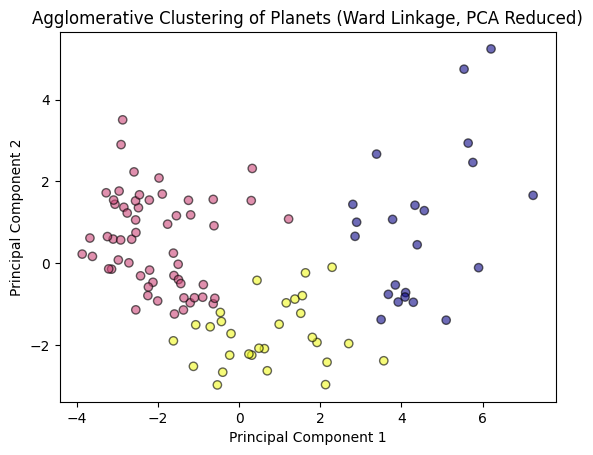

In [127]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with Ward Linkage on PCA-reduced data
agc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_agc = agc.fit_predict(dataset_pca)  # Using PCA-reduced dataset

# Visualizing the clusters
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=y_agc, cmap='plasma', alpha=0.6, edgecolor='k')
plt.title('Agglomerative Clustering of Planets (Ward Linkage, PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [128]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluating Agglomerative Clustering (Ward Linkage)
silhouette_agc = silhouette_score(dataset_pca, y_agc)  # Use PCA-reduced dataset for evaluation
davies_bouldin_agc = davies_bouldin_score(dataset_pca, y_agc)

print(f"Agglomerative Clustering (Ward Linkage) Silhouette Score: {silhouette_agc}")
print(f"Agglomerative Clustering (Ward Linkage) Davies-Bouldin Index: {davies_bouldin_agc}")


Agglomerative Clustering (Ward Linkage) Silhouette Score: 0.4460728495473255
Agglomerative Clustering (Ward Linkage) Davies-Bouldin Index: 0.7505669468379316


Step 3.5.3: Alternative Linkage (Single Linkage or Complete Linkage)
### Agglomerative Hierarchical Clustering (Single Linkage)
We also implement **Agglomerative Clustering** with **Single Linkage**. Single Linkage forms clusters by minimizing the distance between the closest members of different clusters, which can lead to different clustering behavior compared to Ward Linkage.

In [129]:
# Dropping columns with no variance or very limited variance if they exist
non_informative_features = ['Galactic_Trade_Revenue', 'Interstellar_Contact_Cost']
dataset = dataset.drop(columns=[col for col in non_informative_features if col in dataset.columns], errors='ignore')


In [130]:
from sklearn.preprocessing import StandardScaler

# Standardizing the dataset to bring all features to a similar scale
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)


In [131]:
from sklearn.cluster import AgglomerativeClustering

# Applying Agglomerative Hierarchical Clustering with Single Linkage
agc_single = AgglomerativeClustering(n_clusters=3, linkage='single')
y_agc_single = agc_single.fit_predict(dataset)


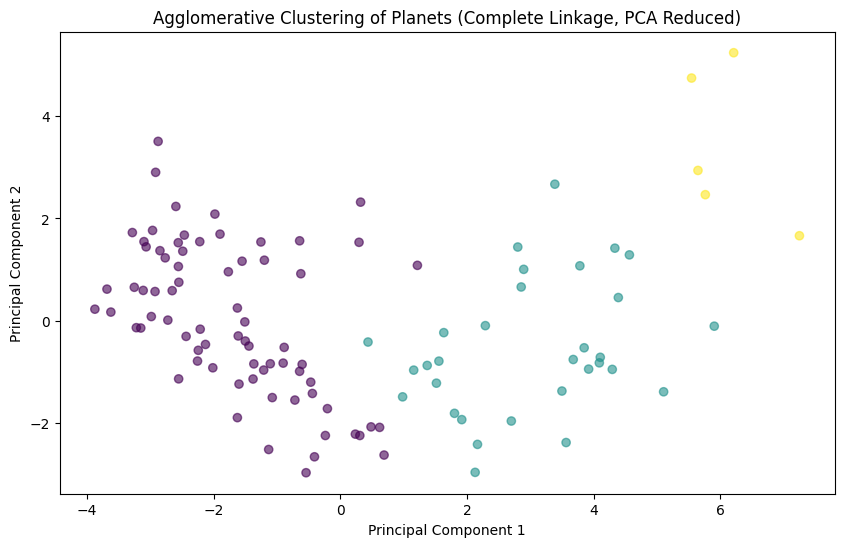

In [132]:
# Perform Agglomerative Clustering on PCA-Reduced Data
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_agc = agc.fit_predict(dataset_pca)

# Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=y_agc, cmap='viridis', alpha=0.6)
plt.title('Agglomerative Clustering of Planets (Complete Linkage, PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [133]:
print(dataset.describe())

       Peace_Treaty_Accords  Technological_Advancements  \
count            109.000000                  109.000000   
mean               0.082569                    0.091743   
std                0.276501                    0.289996   
min                0.000000                    0.000000   
25%                0.000000                    0.000000   
50%                0.000000                    0.000000   
75%                0.000000                    0.000000   
max                1.000000                    1.000000   

       Ammonia_Concentration  Precious_Metal_Trade_Tons  Food_Production_Tons  \
count             109.000000                 109.000000            109.000000   
mean                1.586385                  50.238532             29.927747   
std                 0.969146                  56.075329             40.867085   
min                 0.000000                   0.000000              0.000000   
25%                 1.000000                   8.000000        

Step 3.6: Evaluation Metrics and Experimental Analysis

Step 3.6.1: Evaluation Metrics Implementation
### K-Means Clustering Evaluation
We evaluate the **K-Means** clustering using:
- **Silhouette Score**: Measures how well each point lies within its cluster.
- **Davies-Bouldin Index**: Measures the average similarity ratio of each cluster with other clusters.
Lower Davies-Bouldin values and higher Silhouette scores indicate better clustering.

In [134]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluating K-Means clustering
silhouette_kmeans = silhouette_score(dataset, y_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(dataset, y_kmeans)

print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"K-Means Davies-Bouldin Index: {davies_bouldin_kmeans}")


K-Means Silhouette Score: 0.2744885049885561
K-Means Davies-Bouldin Index: 0.8974138264189655


Evaluation for Agglomerative Clustering (Ward and Single Linkage)
### Agglomerative Clustering Evaluation
We evaluate both **Ward Linkage** and **Single Linkage** for Agglomerative Clustering:
- **Silhouette Score** and **Davies-Bouldin Index** are used to understand how well the points are clustered.
- The evaluation helps us compare the clustering quality across different linkage methods.

In [135]:
# Evaluating Agglomerative Clustering (Ward Linkage)
silhouette_agc = silhouette_score(dataset, y_agc)
davies_bouldin_agc = davies_bouldin_score(dataset, y_agc)

print(f"Agglomerative Clustering (Ward Linkage) Silhouette Score: {silhouette_agc}")
print(f"Agglomerative Clustering (Ward Linkage) Davies-Bouldin Index: {davies_bouldin_agc}")

# Evaluating Agglomerative Clustering (Single Linkage)
silhouette_agc_single = silhouette_score(dataset, y_agc_single)
davies_bouldin_agc_single = davies_bouldin_score(dataset, y_agc_single)

print(f"Agglomerative Clustering (Single Linkage) Silhouette Score: {silhouette_agc_single}")
print(f"Agglomerative Clustering (Single Linkage) Davies-Bouldin Index: {davies_bouldin_agc_single}")


Agglomerative Clustering (Ward Linkage) Silhouette Score: 0.2906239529401427
Agglomerative Clustering (Ward Linkage) Davies-Bouldin Index: 1.1174708864911282
Agglomerative Clustering (Single Linkage) Silhouette Score: -0.14597501488900735
Agglomerative Clustering (Single Linkage) Davies-Bouldin Index: 0.537353786269668


Step 3.7: Experimental Analysis Summary

Step 3.7.1: Comparing Models
### Summary of Clustering Model Evaluation
We present a summary of the evaluation metrics for all the clustering models we implemented.
The table below compares **Silhouette Score** and **Davies-Bouldin Index** for:
- **K-Means** clustering.
- **Agglomerative Clustering with Ward Linkage**.
- **Agglomerative Clustering with Single Linkage**.
This summary helps us choose the most effective model based on clustering quality.

In [136]:
import pandas as pd

# Summary of clustering evaluation metrics
results = {
    'Model': ['K-Means', 'Agglomerative (Ward Linkage)', 'Agglomerative (Single Linkage)'],
    'Silhouette Score': [silhouette_kmeans, silhouette_agc, silhouette_agc_single],
    'Davies-Bouldin Index': [davies_bouldin_kmeans, davies_bouldin_agc, davies_bouldin_agc_single]
}

results_df = pd.DataFrame(results)
print(results_df)


                            Model  Silhouette Score  Davies-Bouldin Index
0                         K-Means          0.274489              0.897414
1    Agglomerative (Ward Linkage)          0.290624              1.117471
2  Agglomerative (Single Linkage)         -0.145975              0.537354


In [137]:
# Assuming dataset is the processed dataset used for clustering

# Adding K-means cluster labels
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(dataset)
dataset['KMeans_Cluster'] = y_kmeans

# Adding Agglomerative (Ward Linkage) cluster labels
agc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_agc = agc.fit_predict(dataset)
dataset['Hierarchical_Cluster'] = y_agc

# Adding Agglomerative (Single Linkage) cluster labels
agc_single = AgglomerativeClustering(n_clusters=3, linkage='single')
y_agc_single = agc_single.fit_predict(dataset)
dataset['Agglomerative_Cluster'] = y_agc_single

# Assigning the dataset with cluster labels to alien_galaxy_df
alien_galaxy_df = dataset


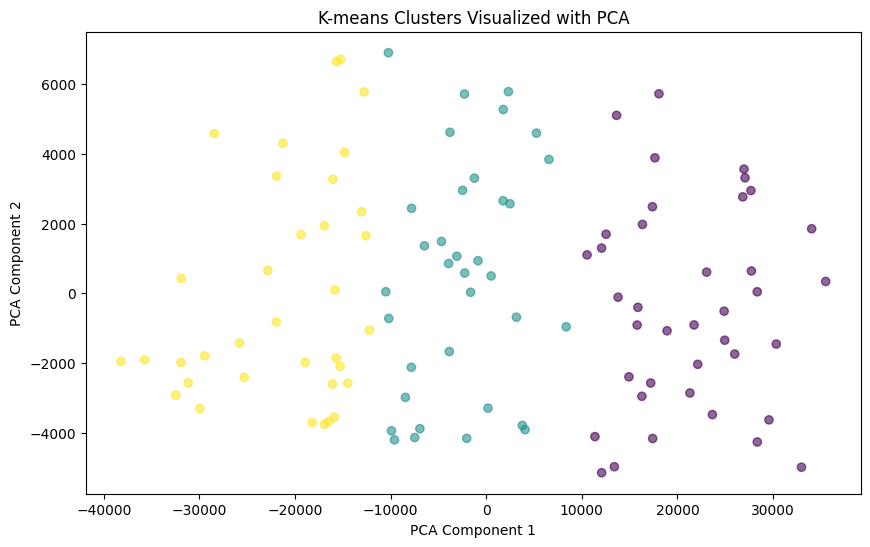

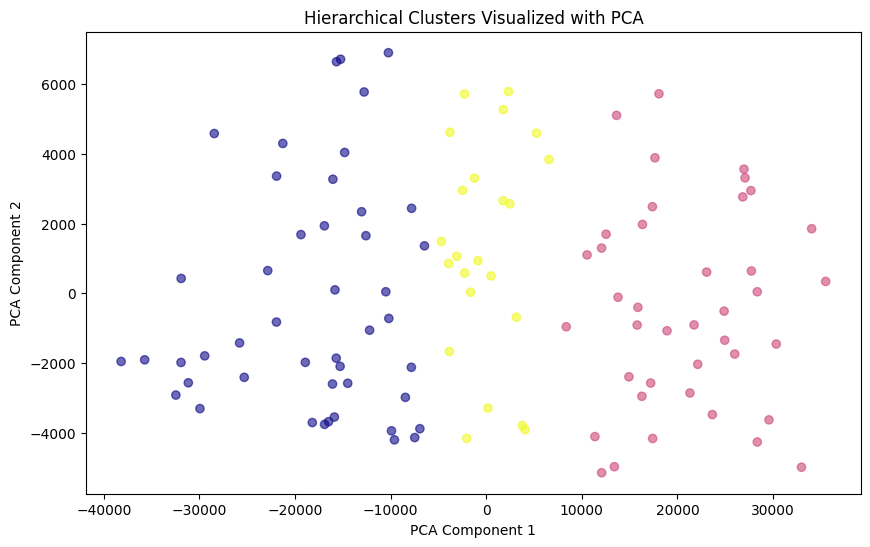

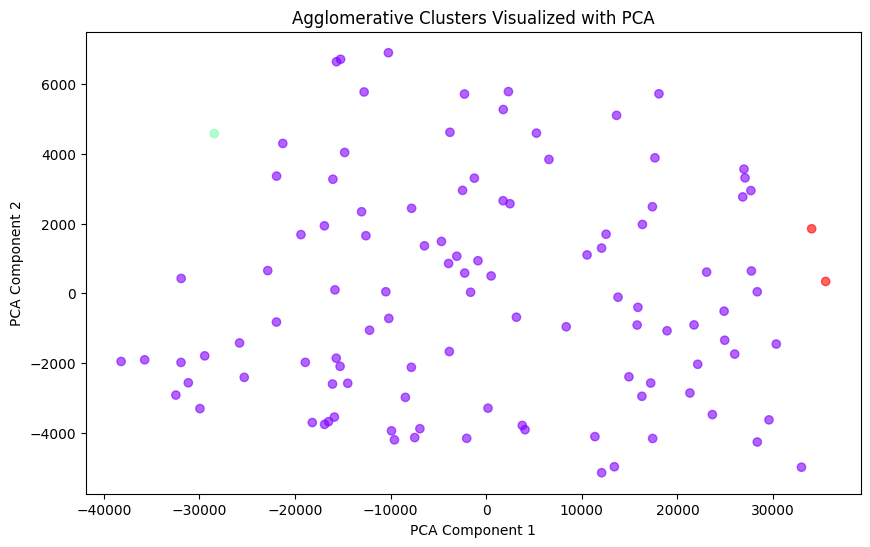

In [138]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(alien_galaxy_df.drop(['KMeans_Cluster', 'Hierarchical_Cluster', 'Agglomerative_Cluster'], axis=1))

# Visualize K-means Clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=alien_galaxy_df['KMeans_Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.title('K-means Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Visualize Hierarchical Clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=alien_galaxy_df['Hierarchical_Cluster'], cmap='plasma', marker='o', alpha=0.6)
plt.title('Hierarchical Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Visualize Agglomerative Clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=alien_galaxy_df['Agglomerative_Cluster'], cmap='rainbow', marker='o', alpha=0.6)
plt.title('Agglomerative Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
